In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("C:\\Users\\Admin\\Desktop\\internship\\dataset.csv"))

In [20]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished


In [21]:
housing.shape

(506, 13)

In [13]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.653772
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.843380
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    object
 6   guestroom         517 non-null    object
 7   basement          517 non-null    object
 8   hotwaterheating   517 non-null    object
 9   airconditioning   517 non-null    object
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    object
 12  furnishingstatus  517 non-null    object
dtypes: int64(6), object(7)
memory usage: 72.7+ KB


In [15]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

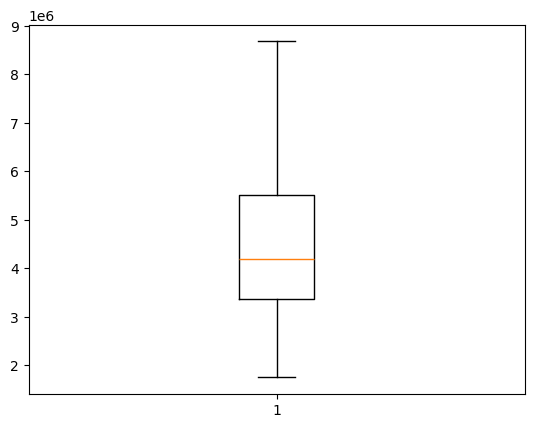

In [22]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

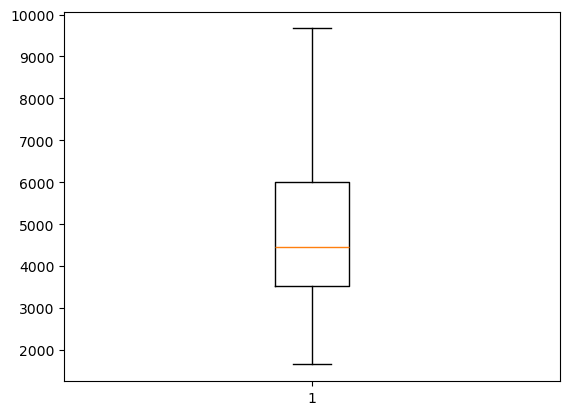

In [23]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [24]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished


In [26]:
status = pd.get_dummies(housing['furnishingstatus'])

In [27]:
status.head()

,furnished,semi-furnished,unfurnished
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False
25,True,False,False


In [28]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [29]:
housing = pd.concat([housing, status], axis = 1)

In [30]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished,False,False
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished,False,False


In [31]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,False,False
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,False,False


In [32]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
502,0.131313,0.223422,0.2,0.0,0.000000,1,0,0,0,0,0.333333,0,True,False
101,0.646465,0.476967,0.4,0.0,0.666667,1,0,0,0,0,0.333333,1,False,True
517,0.101010,0.163173,0.2,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
235,0.414141,0.499561,0.4,0.0,0.333333,1,1,0,0,1,0.333333,0,True,False
110,0.626263,0.615037,0.4,0.0,0.000000,1,1,1,0,0,0.666667,1,True,False


In [36]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.395891,0.394150,0.387571,0.124294,0.269303,0.836158,0.177966,0.358757,0.039548,0.310734,0.209040,0.211864
std,0.215977,0.217096,0.151530,0.232190,0.288778,0.370656,0.383026,0.480315,0.195171,0.463449,0.280956,0.409208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.227250,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.353535,0.351450,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.539141,0.539726,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y_train = df_train.pop('price')
X_train = df_train

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:


rfe = RFE(estimator=lm, n_features_to_select=6)
rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 2),
 ('basement', False, 6),
 ('hotwaterheating', False, 4),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 5)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [42]:
X_train_rfe = X_train[col]

In [43]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     85.05
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           3.88e-65
Time:                        19:09:33   Log-Likelihood:                 200.82
No. Observations:                 354   AIC:                            -387.6
Df Residuals:                     347   BIC:                            -360.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1155      0.016     

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.81
1,area,1.28
3,stories,1.18
5,parking,1.17
4,airconditioning,1.16
2,bathrooms,1.10
6,prefarea,1.04


In [48]:
y_train_price = lm.predict(X_train_rfe)

In [49]:
res = (y_train_price - y_train)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

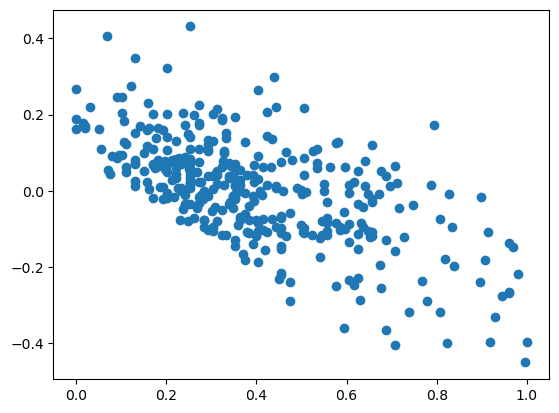

In [52]:
plt.scatter(y_train,res)
plt.show()

In [53]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [54]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [55]:
y_test = df_test.pop('price')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test_rfe = X_test[X_train_rfe.columns]

In [56]:
y_pred = lm.predict(X_test_rfe)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6855667222048785

Text(0, 0.5, 'y_pred')

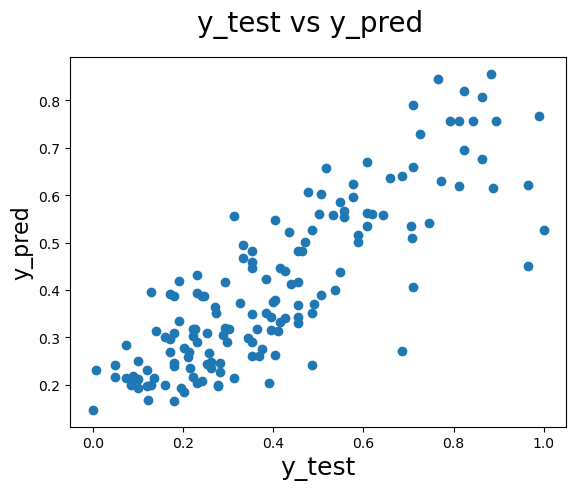

In [58]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [74]:
X_test_rfe

,const,area,bathrooms,stories,airconditioning,parking,prefarea
234,1.0,0.308651,0.5,0.333333,0.0,0.666667,0.0
266,1.0,0.447059,0.0,0.000000,0.0,0.666667,1.0
541,1.0,0.103806,0.0,0.000000,0.0,0.000000,0.0
52,1.0,0.602076,0.5,1.000000,1.0,0.333333,0.0
353,1.0,0.166920,0.0,0.666667,0.0,0.000000,1.0
...,...,...,...,...,...,...,...
310,1.0,0.600000,0.0,0.000000,0.0,0.000000,0.0
154,1.0,0.276817,0.5,0.333333,0.0,0.666667,0.0
213,1.0,0.462976,0.5,0.000000,0.0,0.000000,0.0
486,1.0,0.602076,0.0,0.000000,0.0,0.000000,0.0


In [77]:
import pandas as pd

# Define the test data
test_data = {
    'const': [1.0, 1.0],  
    'area': [0.308651, 0.447059], 
    'bathrooms': [0.5, 0.0],  
    'stories': [0.333333, 0.0],  
    'airconditioning': [0.0, 0.0],  
    'parking': [0.666667, 0.666667], 
    'prefarea': [0.0, 1.0] 
}

# Create a DataFrame with the test data
test_df = pd.DataFrame(test_data)

# Make predictions using the trained model (lm)
predicted_price = lm.predict(test_df)

# Print the predicted prices
print("Predicted house prices:")
for i, price in enumerate(predicted_price):
    print(f"House {i + 1}: {price}")


Predicted house prices:
House 1: 0.4474329184964966
House 2: 0.4223129410748148
